<a href="https://colab.research.google.com/github/henry-254/CapstoneProjects/blob/main/Financial_inclusion_in_africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

In [ ]:
 ! unzip financial-inclusion-in-africa.zip

Archive:  financial-inclusion-in-africa.zip
replace StarterNotebook.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: StarterNotebook.ipynb   
  inflating: Train.csv               
  inflating: Test.csv                
  inflating: VariableDefinitions.csv  
  inflating: SampleSubmission.csv    


In [70]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
import scipy
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

In [72]:
data = pd.read_csv('Train.csv')
test_data = pd.read_csv("Test.csv")


In [73]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [74]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [75]:
for col in data.columns:
  sum = data[col].nunique()
  values = data[col].unique()
  print(f'number of unique values in {col}', sum)
  print(f'element of unique values in{col}', values)
  print('_'*20)

number of unique values in country 4
element of unique values incountry ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
____________________
number of unique values in year 3
element of unique values inyear [2018 2016 2017]
____________________
number of unique values in uniqueid 8735
element of unique values inuniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
____________________
number of unique values in bank_account 2
element of unique values inbank_account ['Yes' 'No']
____________________
number of unique values in location_type 2
element of unique values inlocation_type ['Rural' 'Urban']
____________________
number of unique values in cellphone_access 2
element of unique values incellphone_access ['Yes' 'No']
____________________
number of unique values in household_size 20
element of unique values inhousehold_size [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
____________________
number of unique values in age_of_respo

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [77]:
##since there are no null values in the dataset, no need of handling missing values
## the column id doesnt seem to have any effect on the data, so we will just delete the column
data.drop('uniqueid', axis =1, inplace =True)

In [78]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [80]:
test_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Some of the insights we can get form the data
1. **Geographical Distribution**: By examining the "country" and "location_type" columns, we can determine the distribution of respondents between rural and urban areas, as well as the distribution of data across different countries (Kenya and Uganda in this case).

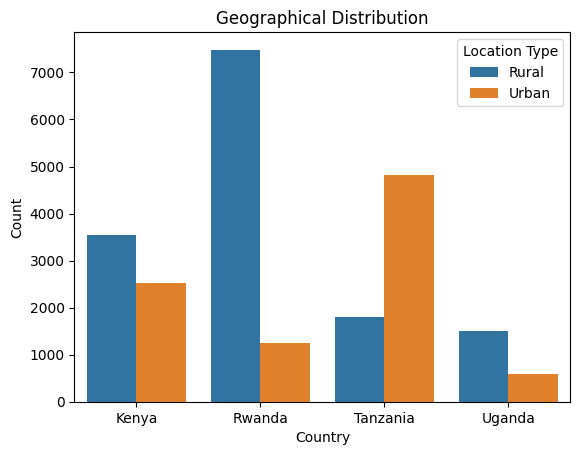

In [81]:
# Geographical Distribution
sns.countplot(data=data, x='country', hue='location_type')
plt.title('Geographical Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Location Type')
plt.show()

we can tell the distribution is not evenly distributed as the majority of the countries, the data came from the rural areas.

2. **Cellphone Access**: Analyzing the "cellphone_access" column can provide insights into the availability and usage of cellphones among the respondents. This can be an important factor for financial inclusion and accessibility to mobile banking services.

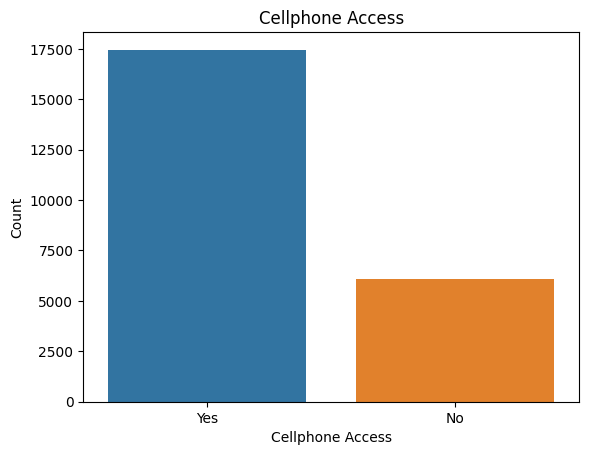

In [82]:
# Cellphone Access
sns.countplot(data=data, x='cellphone_access')
plt.title('Cellphone Access')
plt.xlabel('Cellphone Access')
plt.ylabel('Count')
plt.show()

majority of the respondents here have cellphone access, meaning if the bank could give access to mobile banking services, could increase the number of people having bank accounts. 

3. **Demographic Characteristics**: Exploring the "age_of_respondent," "gender_of_respondent," and "household_size" columns can provide insights into the demographic profile of the respondents. We can analyze the age distribution, gender distribution, and the average household size in the dataset

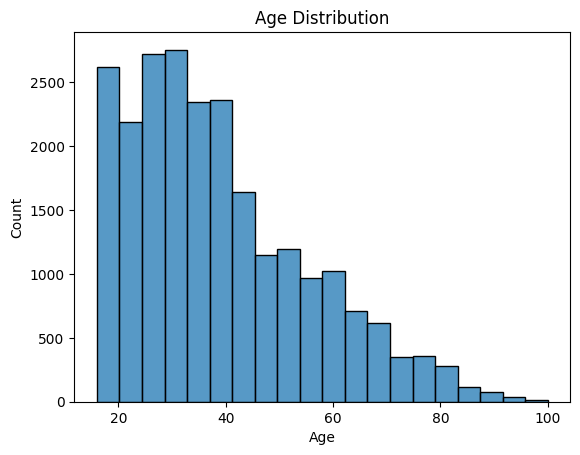

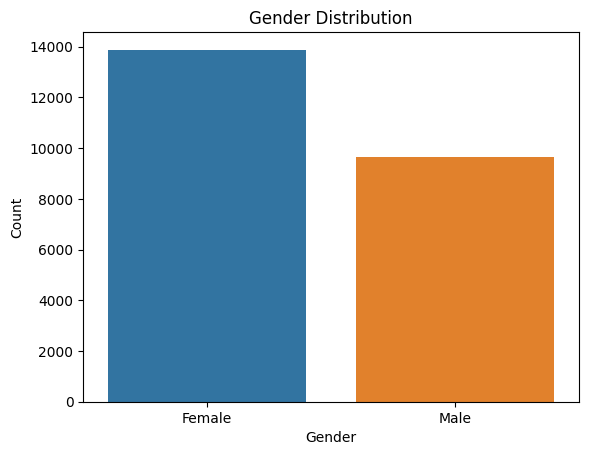

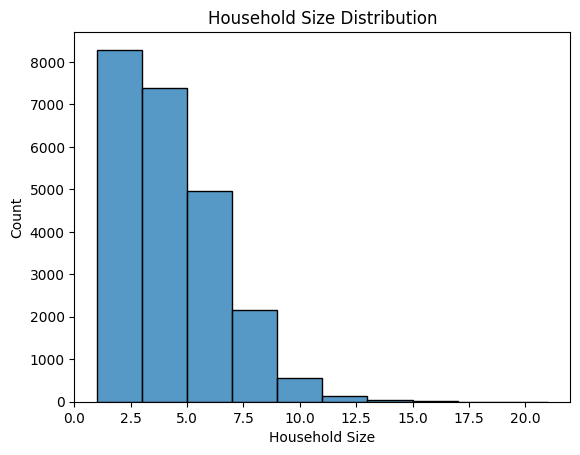

In [83]:
# Demographic Characteristics
sns.histplot(data=data, x='age_of_respondent', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.countplot(data=data, x='gender_of_respondent')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

sns.histplot(data=data, x='household_size', bins=10)
plt.title('Household Size Distribution')
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.show()

# These plots visualize the distribution of age, gender, and household size among the respondents, providing insights into the demographic characteristics of the dataset.



we can tell that the respondents are mostly young people, who majority of them could be males coming from a small household size

4. **Relationship with Head of Household**: By examining the "relationship_with_head" column, we can gain insights into the respondents' relationship with the head of the household, such as whether they are the head, spouse, child, or other relatives. This can help understand the family dynamics within the dataset.

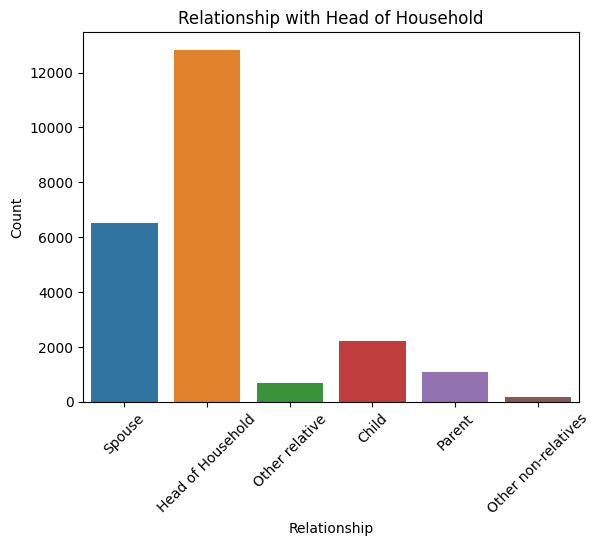

In [84]:
# Relationship with Head of Household
sns.countplot(data=data, x='relationship_with_head')
plt.title('Relationship with Head of Household')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# This plot displays the count of respondents based on their relationship with the head of the household, providing insights into the family dynamics within the dataset.



from our respondents, we can tell that the majority of the class who had a relationship with the head of the household, was actually the head of the household himself

5.**Job Type**: Exploring the "job_type" column can provide insights into the different types of employment among the respondents, such as self-employment, government-dependent, formal employment, informal employment, and others.

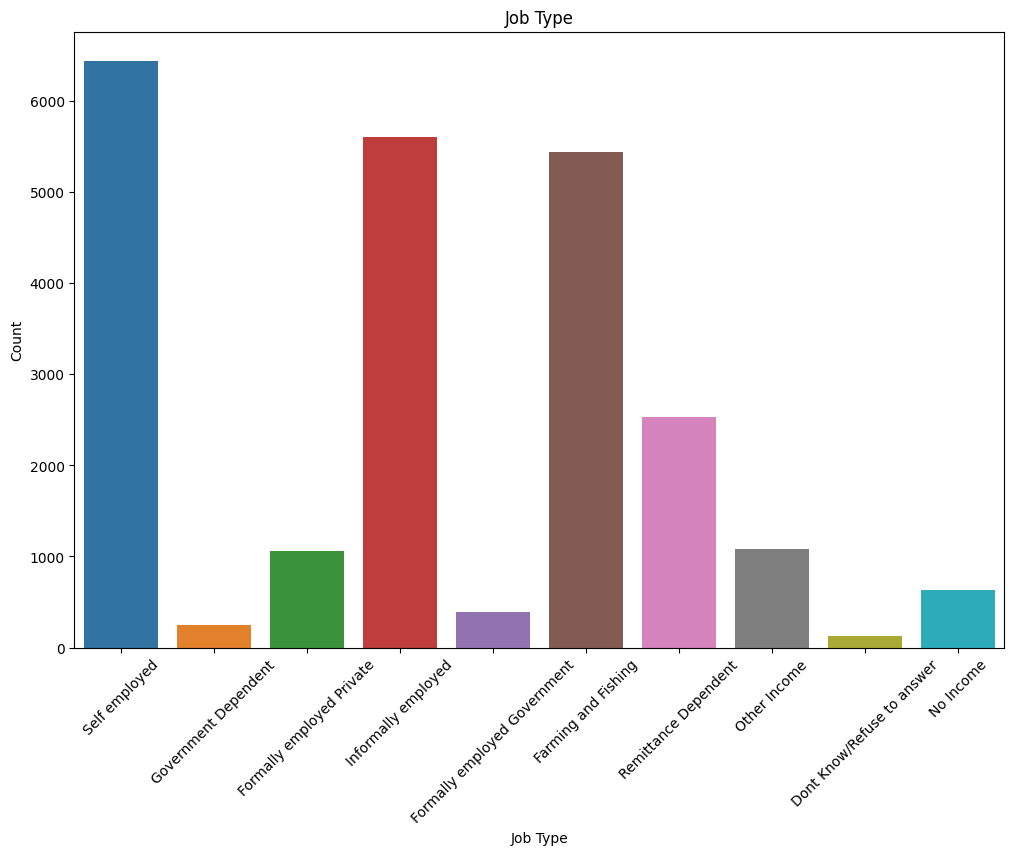

In [92]:
# Job Type
plt.figure(figsize =(12,8))
sns.countplot(data=data, x='job_type')
plt.title('Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#This plot displays the count of respondents based on their job types, providing insights into the different types of employment within the dataset.



## Visualization
visualize on features by our target_Variable(bank_account)

In [114]:

def barplot(features):
    grouped = data.groupby(features)['bank_account'].value_counts().reset_index(name='counts')

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(data=grouped, x=features, y='counts', hue='bank_account')
    ax.set_title(f'Comparison of bank accounts for different {features}')

    plt.show()

   


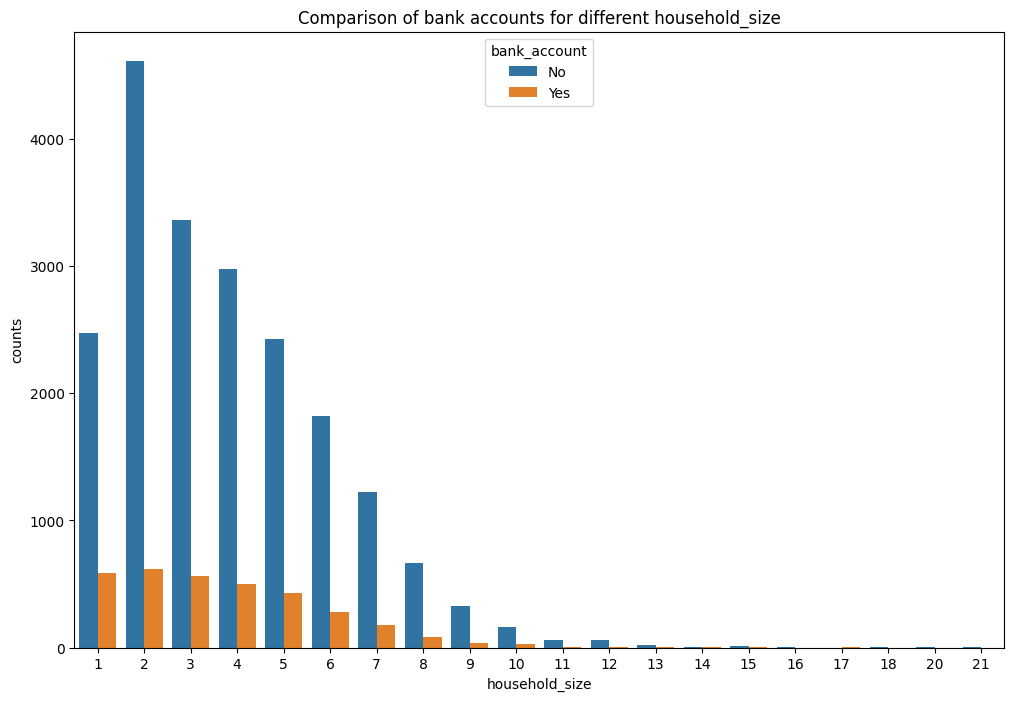

In [115]:
barplot('household_size')


In [116]:
### from the graph above we can tell, that the households that are in fewer size, has more bank accounts compared to the one with larger sizes 

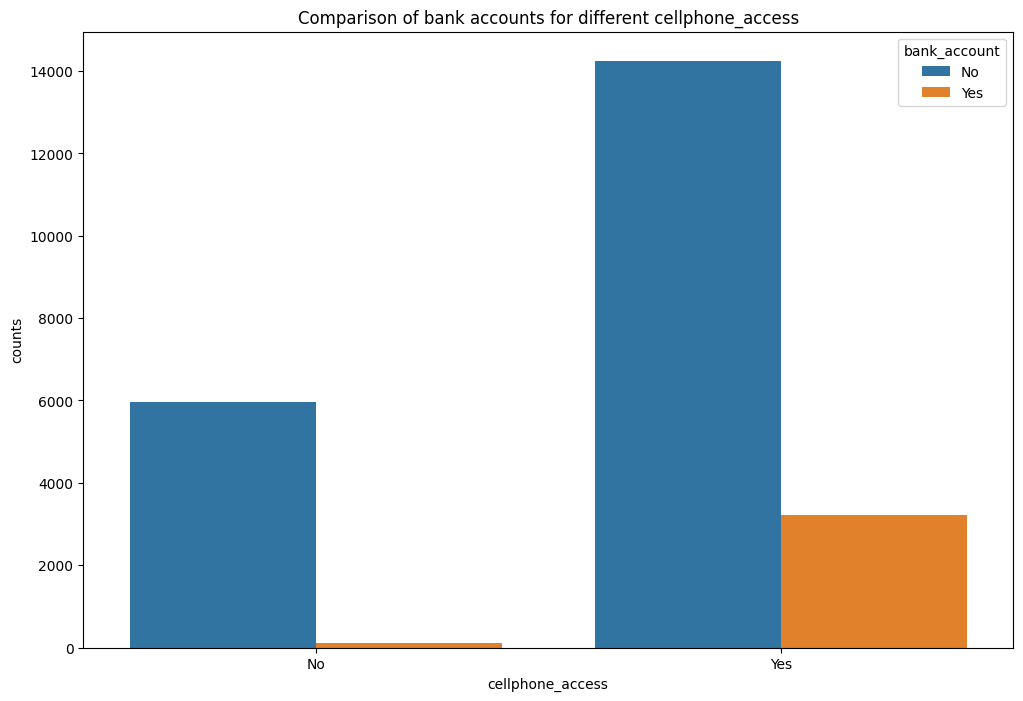

In [117]:
barplot('cellphone_access')

In [118]:
# we can conclude, cell_phone access gives ease to people for access to a  bank account, but in the spread of the use of banking mobile banking,
# could lead to an increase in the size of people having a bank account, because more of the respondents have a cell phone

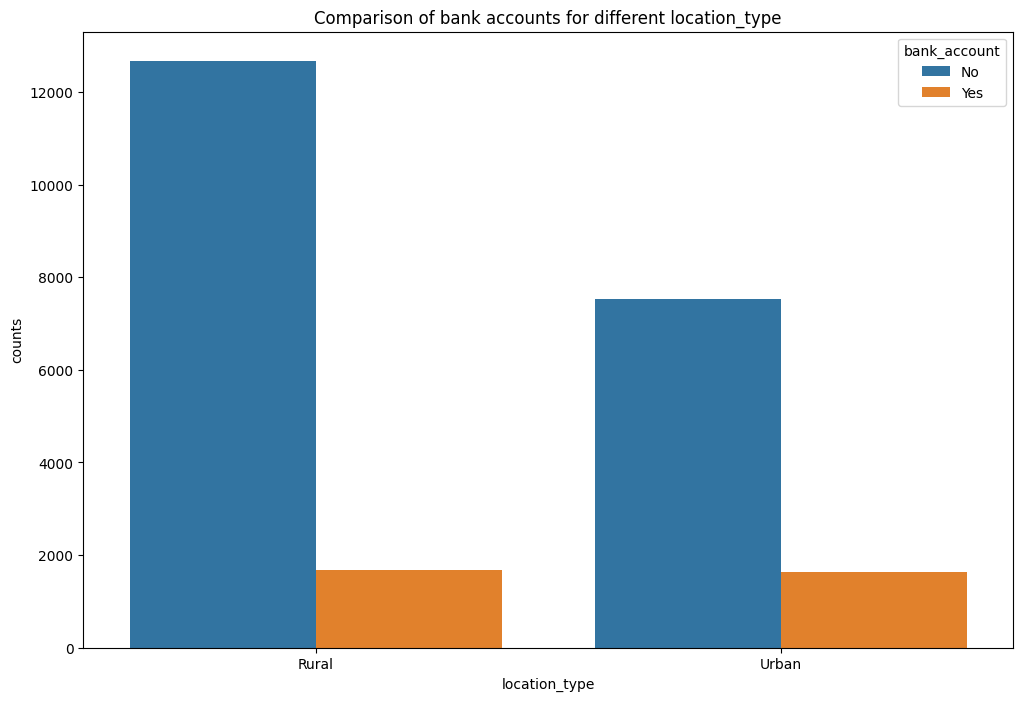

In [119]:
barplot('location_type')

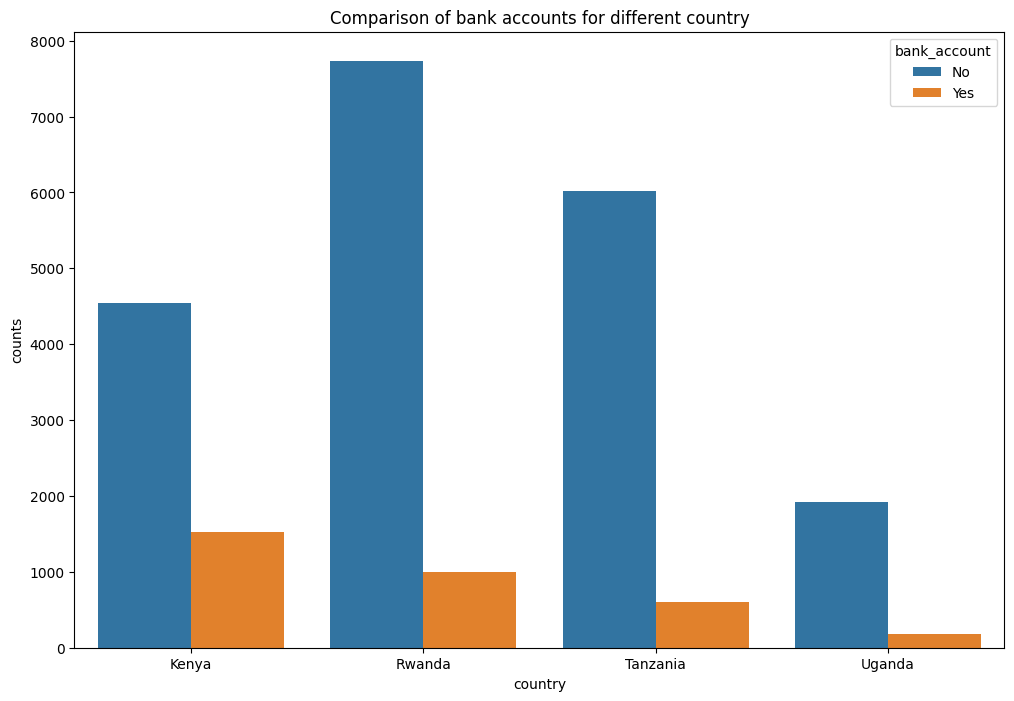

In [120]:
barplot('country')

In [121]:
## we can tell that majority of this countries, people dont have a bank account, while in the majority of people who have a bank account are in kenya


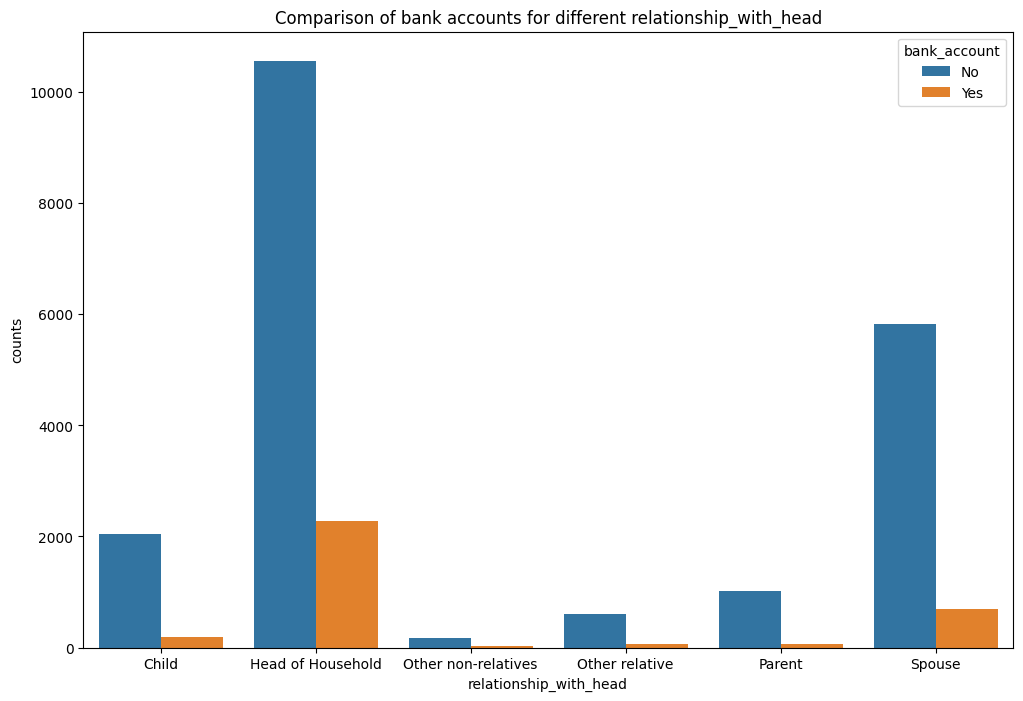

In [122]:
barplot('relationship_with_head')

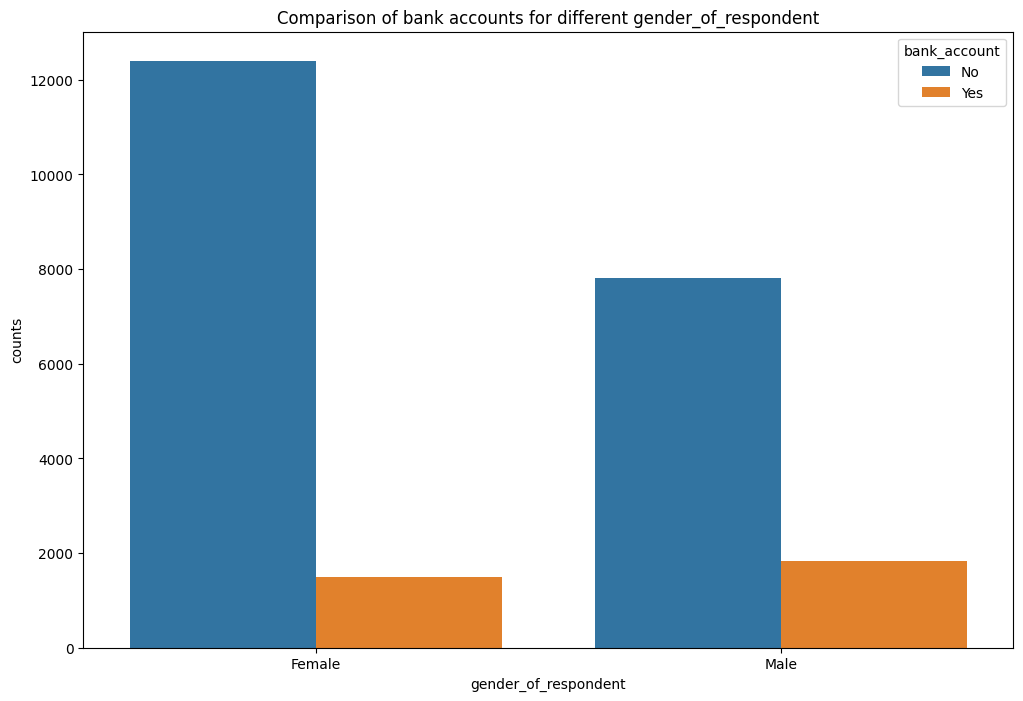

In [123]:
barplot('gender_of_respondent')

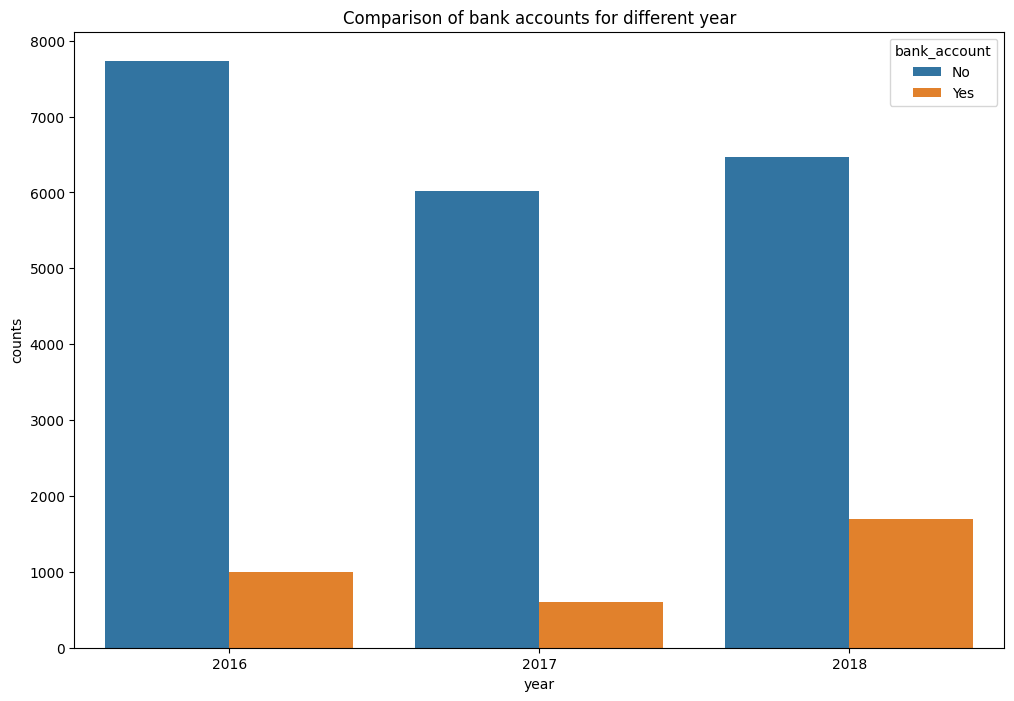

In [124]:
barplot('year')

we can tell there is an increase in people having a bank account as we progress by the year

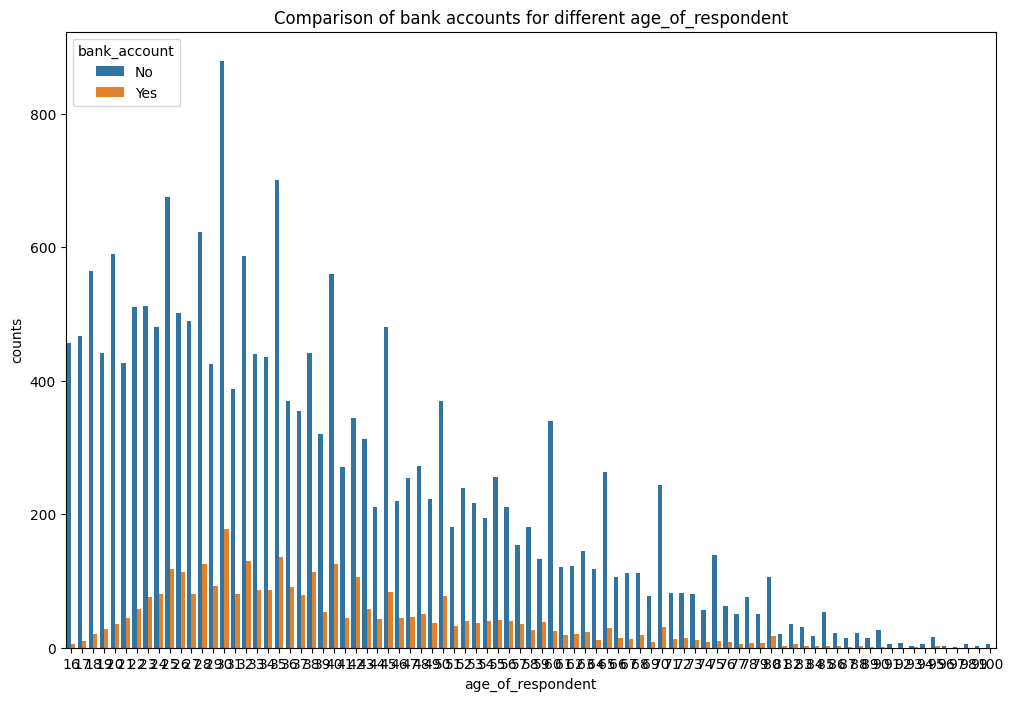

In [125]:
barplot('age_of_respondent')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<function matplotlib.pyplot.xlim(*args, **kwargs)>

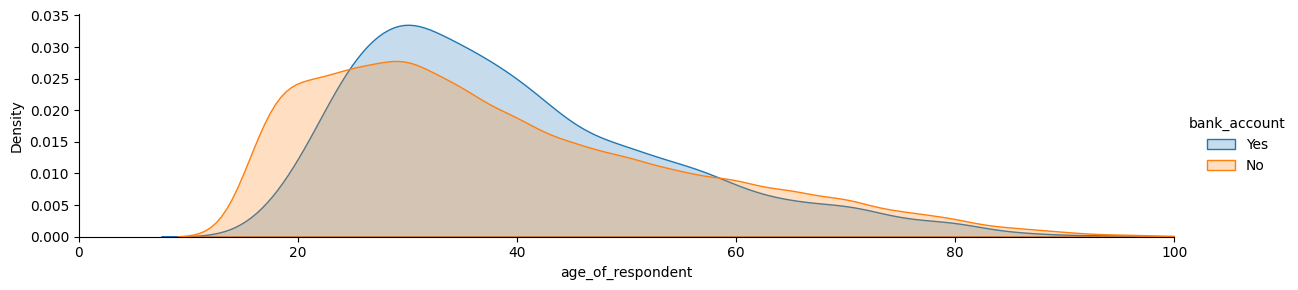

In [126]:

fig = sns.FacetGrid(data, hue = 'bank_account', aspect = 4)
fig.map(sns.kdeplot, 'age_of_respondent', shade = True)
fig.set(xlim=(0,data['age_of_respondent'].max()))
fig.add_legend()
plt.xlim

In [130]:
# the second distribution, give us the ease to compare the age of respondent and the likelyhood of having an account, since it has a nice spread
# we can tell people from early 20's to early 40's are the one who are likely to have a bank account

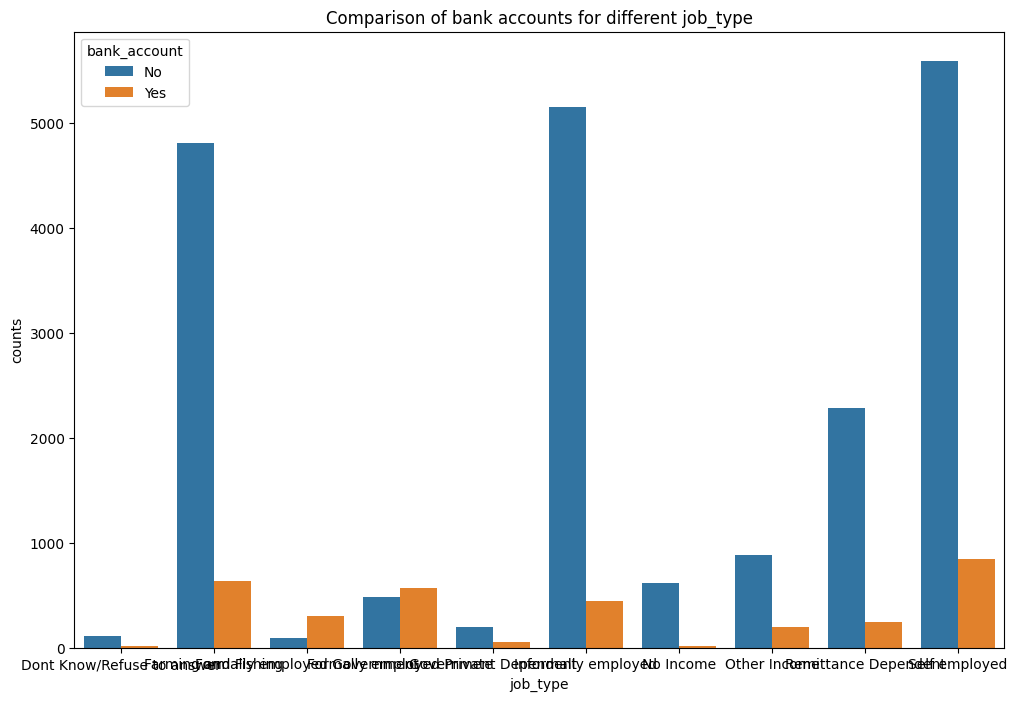

In [128]:
barplot('job_type')

In [129]:
# we then can do encoding dor further anaysis,since majority of our data is in object dtype

In [131]:
# we then set a cat variable to hold our categorical variables 
cat = data.select_dtypes(include = 'object')

In [132]:
test_data.drop(columns ='uniqueid',inplace = True)
cats = test_data.select_dtypes(include  ='object')

In [133]:
### we do encoding for our training dataset
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each variable
for  col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

In [134]:
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,2,8,0,5,2,3,9
1,0,2,0,0,0,4,54,0,1,4,0,4
2,0,2,1,1,1,4,10,1,3,3,5,9
3,0,2,0,0,1,4,18,0,1,2,2,3
4,0,2,0,1,0,7,10,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,0,0,1,3,32,0,1,0,0,7
23520,3,2,0,0,1,1,11,0,1,3,3,7
23521,3,2,0,0,1,4,11,0,4,4,2,7
23522,3,2,0,1,1,6,14,0,4,0,3,9


<Axes: >

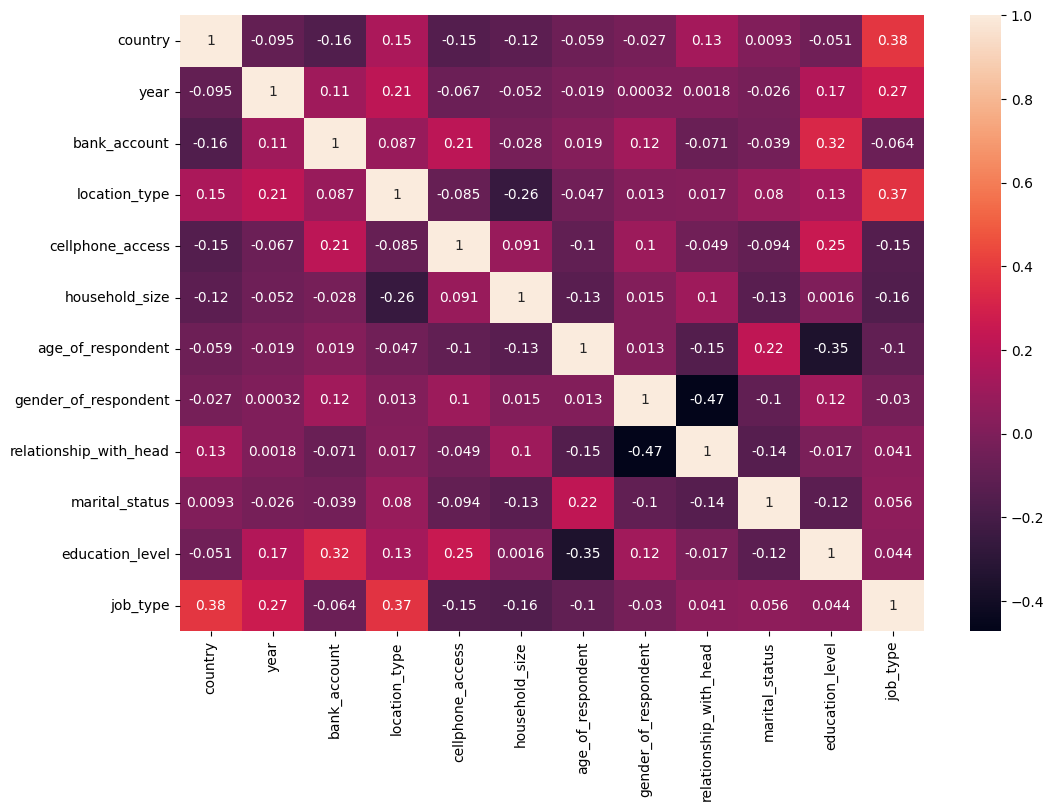

In [135]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot =True)

In [ ]:
## check if data is imbalanced

In [ ]:
counts = data['bank_account'].value_counts()

In [ ]:
counts

0    20212
1     3312
Name: bank_account, dtype: int64

<Axes: ylabel='bank_account'>

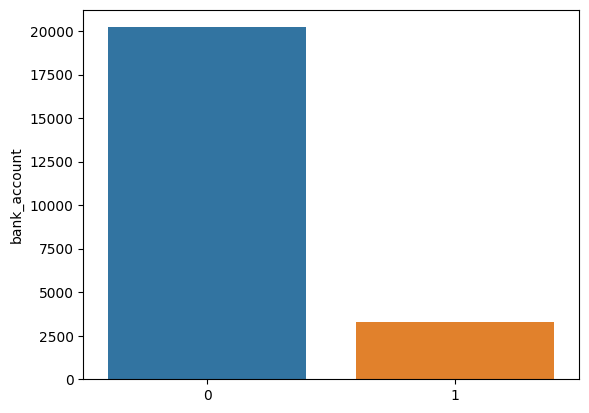

In [ ]:
sns.barplot(x = counts.index, y = counts,  data =data)
## sns.countplot(x = 'bank_account' , data = data)

In this case i decided to do oversampling, as it gives more on model performance as opposed to downsampling

In [136]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop('bank_account', axis=1)
y = data['bank_account']

# Apply Random Oversampling to the minority class
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
oversampled_class_distribution = y_oversampled.value_counts()
print("Class distribution after oversampling:")
print(oversampled_class_distribution)



Class distribution after oversampling:
1    20212
0    20212
Name: bank_account, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Best Hyperparameters for LogisticRegression
{'C': 10, 'penalty': 'l2'}
Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4035
           1       0.74      0.76      0.75      4050

    accuracy                           0.75      8085
   macro avg       0.75      0.75      0.75      8085
weighted avg       0.75      0.75      0.75      8085



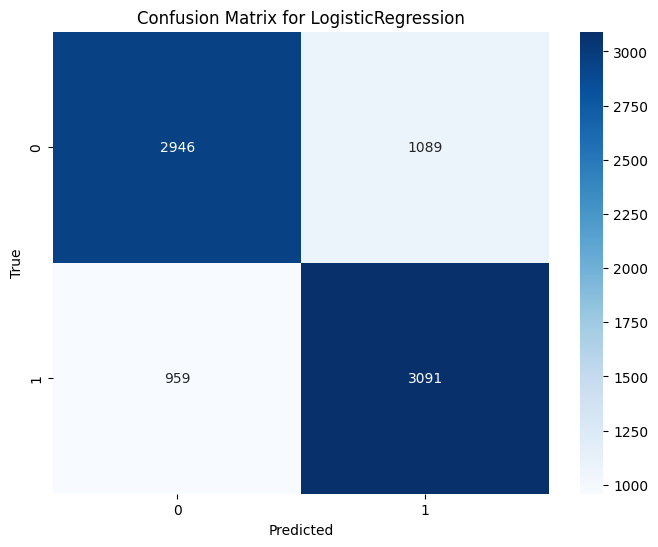

--------------------------------------
Best Hyperparameters for RandomForestClassifier
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4035
           1       0.90      0.98      0.94      4050

    accuracy                           0.93      8085
   macro avg       0.94      0.93      0.93      8085
weighted avg       0.94      0.93      0.93      8085



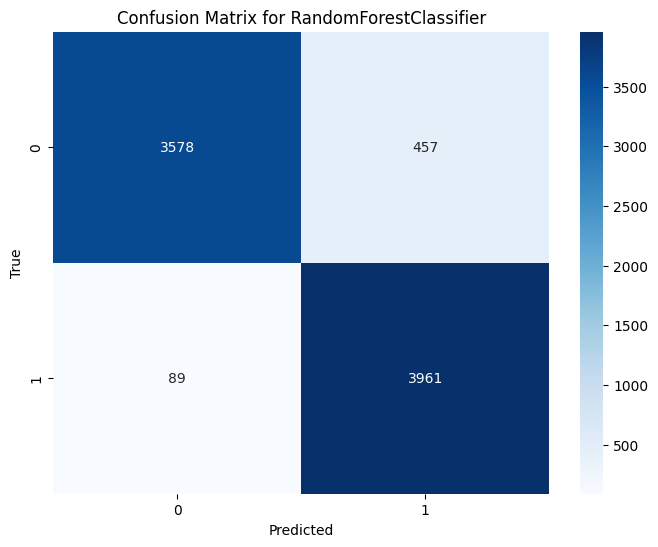

--------------------------------------
Best Hyperparameters for SVC
{'C': 10, 'kernel': 'rbf'}
Classification Report for SVC
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4035
           1       0.77      0.77      0.77      4050

    accuracy                           0.77      8085
   macro avg       0.77      0.77      0.77      8085
weighted avg       0.77      0.77      0.77      8085



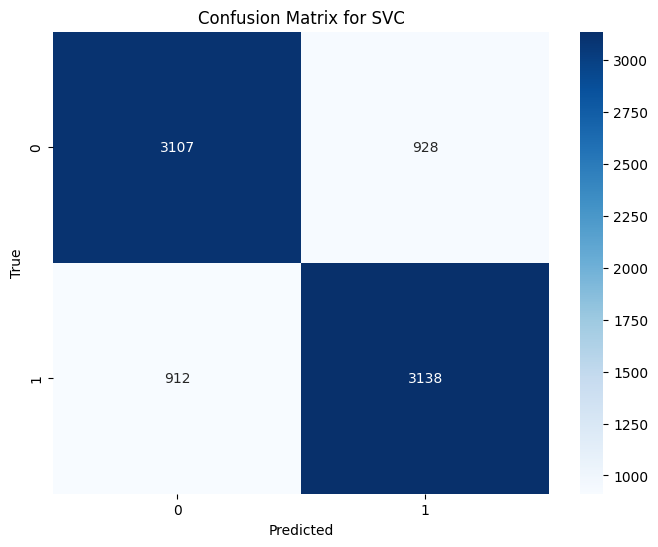

--------------------------------------
Best Hyperparameters for KNeighborsClassifier
{'n_neighbors': 3, 'weights': 'distance'}
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      4035
           1       0.84      0.97      0.90      4050

    accuracy                           0.89      8085
   macro avg       0.90      0.89      0.89      8085
weighted avg       0.90      0.89      0.89      8085



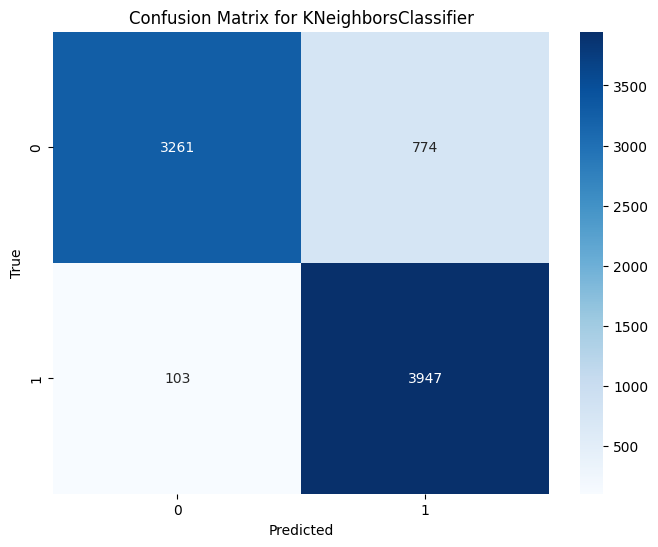

--------------------------------------
[15:40:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[15:40:41] 

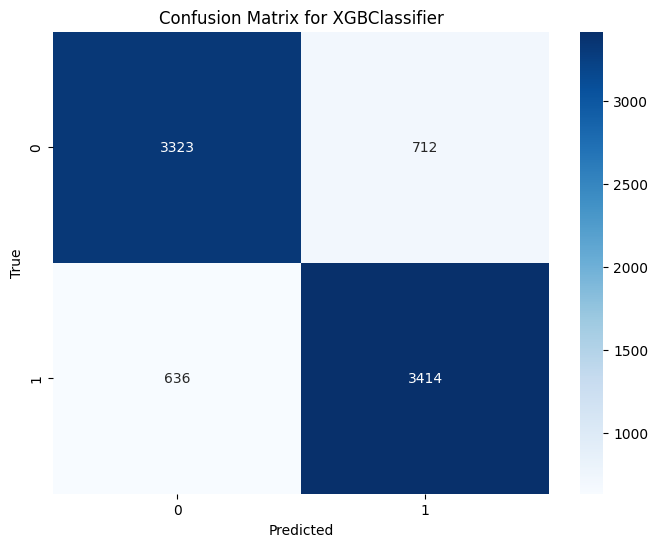

--------------------------------------


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

#list of classifiers to evaluate
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier()
]

# Defining the parameter grid for grid search for each classifier
param_grids = [
    {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    {
        'n_estimators': [20, 30],
        'max_depth': [None, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    {
        'C': [10],
        'kernel': ['rbf']
    },
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
      {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
    }
]

# Perform hyperparameter tuning and evaluation for each classifier(while ploting each instance)
for classifier, param_grid in zip(classifiers, param_grids):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
     # Plot the mean cross-validation score for each hyperparameter combination
    scores = grid_search.cv_results_['mean_test_score']
    params = grid_search.cv_results_['params']



 
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print("Best Hyperparameters for", classifier.__class__.__name__)
    print(best_params)
    
    y_pred = best_model.predict(X_test)
    
    print("Classification Report for", classifier.__class__.__name__)
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix for " + classifier.__class__.__name__)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    
    print("--------------------------------------")


In [155]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each variable
for  col in test_data.columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [156]:

# Initialize RandomForestClassifier with best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=30, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the best model to your training data
best_rf_model.fit(X_train, y_train)

# Predict on the new data
test_data_predictions = best_rf_model.predict(test_data)

# Print the predictions
print(test_data_predictions)


[1 1 0 ... 0 0 0]


Our best classifier was RandomForest and XGB(below), which they both gave 93% accuracy

In [175]:

from sklearn.model_selection import GridSearchCV
# create models
xg_model = XGBClassifier()

param_grid = {'min_child_weighth': [1],
        'gamma': [1],
        'subsample': [ 0.8,],
        'max_depth': [ 25,30]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_)     
y_pred = my_xgb_model.predict(X_test)
print("Classification Report for", classifier.__class__.__name__)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[17:19:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

{'gamma': 1, 'max_depth': 30, 'min_child_weighth': 1, 'subsample': 0.8}
Classification Report for XGBClassifier
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4035
           1       0.89      0.97      0.93      4050

    accuracy                           0.93      8085
   macro avg       0.93      0.93      0.93      8085
weighted avg       0.93      0.93      0.93      8085

